## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
shootout_df = pd.read_csv('shootouts.csv')
shootout_df.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-07-26,Malaysia,Kuwait,Malaysia


In [56]:
teams = pd.concat([df['home_team'], df['away_team']]).drop_duplicates()

In [57]:
teams = pd.DataFrame(teams)

In [62]:
teams = teams.set_index(0)

In [63]:
teams

""
0
Scotland
England
Wales
Northern Ireland
United States
...
Chameria
Saint Helena
Asturias


## Task 1 Which teams scored the largest number of goals in FIFA World Cup?

<AxesSubplot:>

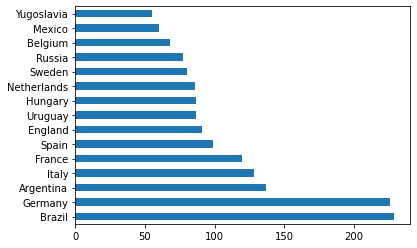

In [6]:
#I am not including shootouts, those don't count as real goals imo, haven't checked if any in World Cup anyways

#Remove non FiFa World Cup Games
df1 = df[df['tournament']=='FIFA World Cup']

#sum home and away game scores
q1_home_scores = df1.groupby(by=['home_team'])['home_score'].sum()
q1_away_scores = df1.groupby(by=['away_team'])['away_score'].sum()

#add them together, sort, limit to 10
q1_team_scores = q1_home_scores.add(q1_away_scores)
q1_team_scores = q1_team_scores.sort_values(ascending=False).head(15)

q1_team_scores.plot(kind='barh')

## Task 2 What is the number of matches played in each tournament throughout history?

In [7]:
# Another way of doing it.

#s2 = df.groupby(by=['tournament'])['date'].count()
#s2.sort_values(ascending=False)

<AxesSubplot:>

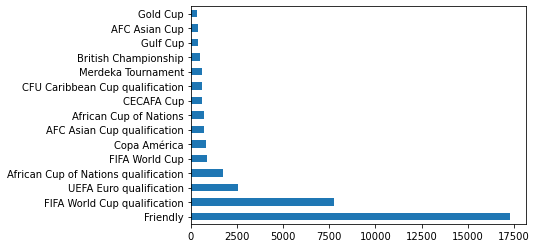

In [8]:
df['tournament'].value_counts().head(15).plot(kind='barh')

## Task 3 Show the trend in number of matches per year.

<AxesSubplot:xlabel='dtdate'>

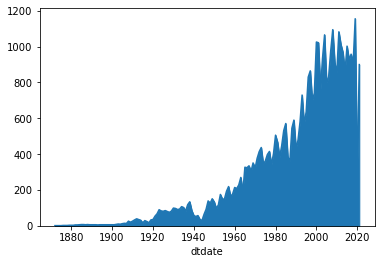

In [9]:
df3 = df.copy()
df3['dtdate'] = pd.to_datetime(df3['date'])
df3 = df3.groupby(df3.dtdate.dt.year).count()
df3 = df3['home_team']
df3.plot(kind='area')

## Task 4 Which teams are the most successful ones? (winning percentage)

In [87]:
#copy dataframe for task4
df4 = df.copy()
shootout_df4 = shootout_df.copy()

#merge shootout winner
df4 = df4.merge(shootout_df4, how='left', left_on=['date', 'home_team', 'away_team'], right_on=['date', 'home_team', 'away_team'])

#add column for loser
df4['loser'] = np.nan

#populate shootout loser
df4.loc[(~df4.winner.isnull())& (df4.winner==df4.home_team),'loser'] = df4['away_team']
df4.loc[(~df4.winner.isnull())& (df4.winner==df4.away_team),'loser'] = df4['home_team']

#populate winner
df4.loc[(df4.winner.isnull()) & (df4.home_score>df4.away_score), 'winner'] = df4['home_team']
df4.loc[(df4.winner.isnull()) & (df4.home_score<df4.away_score), 'winner'] = df4['away_team']

#pupulate loser
df4.loc[(df4.loser.isnull()) & (df4.home_score<df4.away_score), 'loser'] = df4['home_team']
df4.loc[(df4.loser.isnull()) & (df4.home_score>df4.away_score), 'loser'] = df4['away_team']

#pupulate ties
df4.loc[(df4.loser.isnull()) & (df4.home_score==df4.away_score), 'loser'] = 'Tied'
df4.loc[(df4.winner.isnull()) & (df4.home_score==df4.away_score), 'winner'] = 'Tied'
df4.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tied,Tied
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tied,Tied
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England


In [88]:
#games played per team

#games as home
games_played_home = df4.home_team.value_counts()
#games as away
games_played_away = df4.away_team.value_counts()

#create dataframe and ass games home+ away
games_played = pd.concat([games_played_home, games_played_away], axis=1)

#fill na's with 0
games_played['home_team'] = games_played['home_team'].fillna(0)
games_played['away_team'] = games_played['away_team'].fillna(0)

#create new column for total games
games_played['total']= games_played['home_team'] +games_played['away_team']
games_played.head(5)


,home_team,away_team,total
Brazil,583.0,421.0,1004.0
Argentina,560.0,441.0,1001.0
Mexico,528.0,367.0,895.0
Germany,520.0,452.0,972.0
England,515.0,519.0,1034.0


<AxesSubplot:>

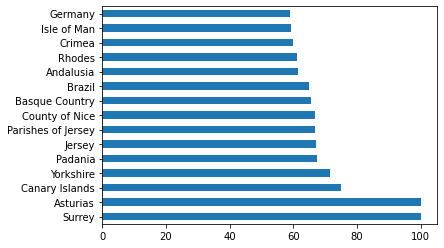

In [102]:
winning_list = df4.winner.value_counts()[1:]
loser_list = df4.loser.value_counts()[1:]
df4t = pd.concat([teams, winning_list, loser_list, games_played['total']], axis=1)

#fill na's with 0
df4t['winner'] = df4t['winner'].fillna(0)
df4t['loser'] = df4t['loser'].fillna(0)

df4t['win_percentage'] = ((df4t.winner/df4t.total) * 100 )

df4t.sort_values(by=['win_percentage'], ascending=False)['win_percentage'].head(15).plot(kind='barh')

## Task Which teams are the least successful ones? (winning percentage)

<AxesSubplot:>

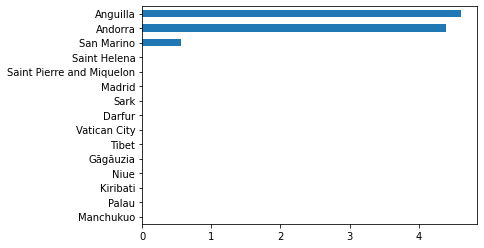

In [103]:
df4t.sort_values(by=['win_percentage'], ascending=True)['win_percentage'].head(15).plot(kind='barh')

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [ ]:
#skipped for now

## Task
Which teams played against each other the most?

In [ ]:
#skipped for now

## Task
Apply your creativity to show some additional insights from the data.

In [ ]:
#skipped for now

## Task (Stretch)
Create these graphs in Tableau as well.

In [ ]:
#hard pass for now